# Filogenia

In [6]:
import docker, os

a = %pwd
wd = (a.rsplit('/',2))[0]

GENE = "BST2"
BLAST_Results=os.path.join("homologue", GENE, "B20210131216DA2B77BFBD2E6699CA9B6D1C41EB200F810O.fasta")


D_CLUSTAL_O='quay.io/biocontainers/clustalo:1.2.4--1'

WORK_HOST_DIRECTORY=wd
WORK_CONT_DIRECTORY='/opt/project'


In [7]:
client = docker.from_env()
bwa_docker_cont = client.containers.run(
    image=D_CLUSTAL_O,
    volumes={WORK_HOST_DIRECTORY: {'bind': WORK_CONT_DIRECTORY,'mode': 'rw'}},
    working_dir= WORK_CONT_DIRECTORY+'/data/multi_align/',
    entrypoint="bash",
    command='{0}/scripts_bash/clustalo.sh {1} {2}'.format(WORK_CONT_DIRECTORY, BLAST_Results, GENE))


In [8]:
from Bio import SeqIO, AlignIO, Phylo

alin_fa = AlignIO.read(os.path.join(wd,"data/multi_align", GENE, f"{GENE}_clustalo.fasta"), "fasta")

print(alin_fa)

Alignment with 6 rows and 589 columns
-----MASTSYDY-----------------CRVPMEDGDKR--C...--- sp|Q10589|BST2_HUMAN
-----MAPTFYHY-----------------HPLPMDQKEPG--C...--- sp|Q6WRU0|BST2_CRIGR
-----MAPSFYHY-----------------LPVPMDEMGGKQGW...--- sp|Q8R2Q8|BST2_MOUSE
-----MAPSFYHY-----------------LPVAMDERWEPKGW...--- sp|Q811A2|BST2_RAT
--------------------------------------------...--- sp|P22311|PU91_BRACO
MKEAELNRDVAKFCTDNQCVILQPQGLGPKSAAPMAPRTLRHV-...DQS sp|P10716|CLC4F_RAT


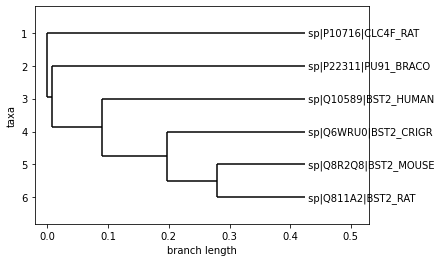

In [11]:
from Bio import Phylo
tree = Phylo.read(os.path.join(wd,"data/multi_align", GENE, f"{GENE}_clustalo.dnd"), "newick")
Phylo.draw(tree)
